# PCA

- 주로 DR(차원축소)을 목적으로 사용되며 
- rough한 모형으로 메인으로 사용하는 모형은 아님
  
  
- 내용은 발제 참고  
  
  
- 예시 상황:   
변수가 400개인 상황에서 모두 모형에 포함시키면 성능문제를 포함하여 몇 가지 문제가 생김  
이 상황에서 PCA를 사용한 변수만 사용(자료의 정보는 보존하면서 사용하는 변수의 수는 줄일 수 있음)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.decomposition import PCA

std = StandardScaler()

boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['target'])

std_X = pd.DataFrame(std.fit_transform(X), columns=X.columns)

pca = PCA() ## n_components지정해서 볼 것 만 볼 수 있음
pca_std = pd.DataFrame(pca.fit_transform(std_X))

In [3]:
pca_std

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-2.098297,0.773113,0.342943,-0.891774,0.423070,-0.315338,0.318641,0.295832,-0.424937,0.640206,-0.033000,0.019440,0.365975
1,-1.457252,0.591985,-0.695199,-0.487459,-0.195876,0.264223,0.553861,-0.223670,-0.166962,0.084236,-0.640810,-0.125797,-0.070719
2,-2.074598,0.599639,0.167122,-0.739204,-0.934534,0.448095,0.484560,0.105166,0.069775,-0.180380,-0.487557,0.133327,-0.014022
3,-2.611504,-0.006871,-0.100284,-0.343721,-1.104956,0.664649,0.622641,0.255941,-0.342246,0.045901,-0.360209,0.508678,0.007847
4,-2.458185,0.097712,-0.075348,-0.427907,-1.065924,0.617047,0.705086,-0.134524,-0.417668,-0.140880,-0.395150,0.497732,0.014274
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.314968,0.724285,-0.860896,-0.434740,-1.121040,0.508064,0.199056,-0.249896,0.877036,0.183086,0.493590,0.450386,0.078978
502,-0.110513,0.759308,-1.255979,-0.309376,-0.891542,0.408208,0.191779,-0.146502,0.853628,0.631847,0.375688,0.252082,0.037162
503,-0.312360,1.155246,-0.408598,-0.786304,-1.595185,0.467947,0.294119,-0.638660,0.981032,0.589670,0.115656,0.281964,0.062474
504,-0.270519,1.041362,-0.585454,-0.678134,-1.416024,0.482259,0.271597,-0.579344,0.936755,0.594610,0.087012,0.301701,0.054370


In [4]:
pca_vars = []
for idx in pca_std:
    pca_vars.append(np.var(pca_std[idx]))
    
cum_vars = pca_vars.copy()
cum_vars[0] /= 13
for i in range(1, len(pca_vars)):
    cum_vars[i] /= 13
    cum_vars[i] += cum_vars[i-1]
    

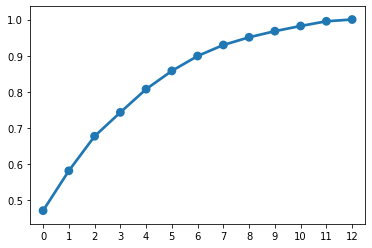

In [5]:
sns.pointplot(x = list(range(13)),y=cum_vars)

In [6]:
# self coding
## PCA를 구하는 핵심은 sigma 찾기

In [7]:
import gc 
gc.collect()

40

In [8]:
# 공식구현
n = len(X)
o = np.ones([n,n])

s = std_X.T @  (np.eye(n) - o/n) @ std_X
s /= (n-1)

In [ ]:
# # ## 위 방법을 모르는 경우
# # # 1. 평균 벡터를 만든다
# # # 2. 삼중 for문을 돌면서 값을 구한다.

# # # 카카오 인턴 예시 코드
# for i in range(1, len(r_bar)):
#     temp_total = sum(mat[i])
#     temp_no_r = mat[i].count(0) - 1
#     temp = (temp_total / (n_i - temp_no_r))
#     r_bar[i] = round((temp_total / (n_i - temp_no_r)), 3)

# for i in range(1, n_u + 1):
#     for j in range(1, n_u + 1):
#         if i != j:
#             f1 = 0
#             f2 = 0
#             f3 = 0
#             for k in range(1, n_i + 1):
#                 if mat[i][k] != 0 and mat[j][k] != 0:
#                     f1 += (mat[i][k] - r_bar[i]) * (mat[j][k] - r_bar[j])
#                     f2 += (mat[i][k] - r_bar[i]) ** 2
#                     f3 += (mat[j][k] - r_bar[j]) ** 2

In [10]:
s

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.001980,-0.200866,0.407389,-0.056002,0.421805,-0.219681,0.353433,-0.380422,0.626744,0.583918,0.290520,-0.385826,0.456524
ZN,-0.200866,1.001980,-0.534885,-0.042781,-0.517627,0.312608,-0.570665,0.665724,-0.312566,-0.315186,-0.392454,0.175868,-0.413812
INDUS,0.407389,-0.534885,1.001980,0.063063,0.765164,-0.392451,0.646055,-0.709429,0.596308,0.722187,0.384006,-0.357683,0.604995
CHAS,-0.056002,-0.042781,0.063063,1.001980,0.091383,0.091432,0.086689,-0.099372,-0.007383,-0.035657,-0.121756,0.048885,-0.054036
NOX,0.421805,-0.517627,0.765164,0.091383,1.001980,-0.302787,0.732919,-0.770753,0.612651,0.669346,0.189307,-0.380803,0.592049
RM,-0.219681,0.312608,-0.392451,0.091432,-0.302787,1.001980,-0.240741,0.205653,-0.210262,-0.292626,-0.356205,0.128322,-0.615024
AGE,0.353433,-0.570665,0.646055,0.086689,0.732919,-0.240741,1.001980,-0.749361,0.456925,0.507458,0.262033,-0.274076,0.603531
DIS,-0.380422,0.665724,-0.709429,-0.099372,-0.770753,0.205653,-0.749361,1.001980,-0.495567,-0.535490,-0.232931,0.292089,-0.497980
RAD,0.626744,-0.312566,0.596308,-0.007383,0.612651,-0.210262,0.456925,-0.495567,1.001980,0.912031,0.465661,-0.445293,0.489644
TAX,0.583918,-0.315186,0.722187,-0.035657,0.669346,-0.292626,0.507458,-0.535490,0.912031,1.001980,0.461766,-0.442683,0.545071


In [11]:
# 고유값
values, vectors = np.linalg.eig(s)

In [12]:
values

array([6.1389812 , 1.43611329, 1.2450773 , 0.85927328, 0.83646904,
       0.65870897, 0.5364162 , 0.39688167, 0.06363502, 0.27749173,
       0.16963823, 0.18638271, 0.22067394])

In [13]:
# 고유값은 독립확인
vectors[0].T @ vectors[1]

-2.498001805406602e-16

In [14]:
# 직접구한 값
vectors[:,0] @ std_X.T

0      2.098297
1      1.457252
2      2.074598
3      2.611504
4      2.458185
         ...   
501    0.314968
502    0.110513
503    0.312360
504    0.270519
505    0.125803
Length: 506, dtype: float64

In [15]:
# 라이브러리써서 구한 값 일치
pca_std[0]

0     -2.098297
1     -1.457252
2     -2.074598
3     -2.611504
4     -2.458185
         ...   
501   -0.314968
502   -0.110513
503   -0.312360
504   -0.270519
505   -0.125803
Name: 0, Length: 506, dtype: float64